In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/jonnyoh/code/JonnyPOH/portfolio/projects/mlproject_stu_score/notebook/homeless_prep.csv')
print(df.head())

   CLIENT_KEY  AGE  GENDER VETERAN  INCOME  NIGHTS  substanceabuse  completed  \
0      256172   20  Female      No     0.0   152.0               0          0   
1      221079   20  Female      No   740.0   229.0               0          1   
2      243074   21  Female      No     0.0   105.0               1          1   
3      129974   21  Female      No     0.0   371.0               1          1   
4      226596   22  Female      No     0.0   169.0               0          0   

   probation  assistancetype  required  
0          1  tempassistance         1  
1          0  tempassistance         1  
2          0  tempassistance         1  
3          0  tempassistance         1  
4          0  tempassistance         1  


In [3]:
df_cleaned = df.drop_duplicates(subset='CLIENT_KEY')
df_cleaned.reset_index(drop=True, inplace=True)

In [4]:
df_cleaned

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
0,256172,20,Female,No,0.00,152.0,0,0,1,tempassistance,1
1,221079,20,Female,No,740.00,229.0,0,1,0,tempassistance,1
2,243074,21,Female,No,0.00,105.0,1,1,0,tempassistance,1
3,129974,21,Female,No,0.00,371.0,1,1,0,tempassistance,1
4,226596,22,Female,No,0.00,169.0,0,0,0,tempassistance,1
...,...,...,...,...,...,...,...,...,...,...,...
110,246748,75,Female,Yes,73.00,15.0,0,1,0,tempassistance,1
111,204806,77,Male,Yes,0.00,12.0,0,1,0,tempassistance,1
112,320878,77,Female,Yes,1331.02,25.0,0,1,0,tempassistance,1
113,258969,79,Female,Yes,694.00,16.0,0,1,0,tempassistance,0


In [5]:
df_cleaned.to_csv('/home/jonnyoh/code/JonnyPOH/portfolio/projects/mlproject_stu_score/notebook/homeless_cleaned.csv', index=False)

In [6]:
print(df_cleaned.isna().sum())
print(df_cleaned.duplicated())

CLIENT_KEY        0
AGE               0
GENDER            0
VETERAN           0
INCOME            0
NIGHTS            3
substanceabuse    0
completed         0
probation         0
assistancetype    0
required          0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
110    False
111    False
112    False
113    False
114    False
Length: 115, dtype: bool


In [7]:
mean_value = df_cleaned['NIGHTS'].mean()
df_cleaned.loc[:, 'NIGHTS'] = df_cleaned['NIGHTS'].fillna(mean_value)

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      115 non-null    int64  
 1   AGE             115 non-null    int64  
 2   GENDER          115 non-null    object 
 3   VETERAN         115 non-null    object 
 4   INCOME          115 non-null    float64
 5   NIGHTS          115 non-null    float64
 6   substanceabuse  115 non-null    int64  
 7   completed       115 non-null    int64  
 8   probation       115 non-null    int64  
 9   assistancetype  115 non-null    object 
 10  required        115 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 10.0+ KB


In [9]:
df_cleaned.nunique()

CLIENT_KEY        115
AGE                48
GENDER              2
VETERAN             2
INCOME             73
NIGHTS             72
substanceabuse      2
completed           2
probation           2
assistancetype      1
required            2
dtype: int64

In [10]:
df_cleaned.describe()

,CLIENT_KEY,AGE,INCOME,NIGHTS,substanceabuse,completed,probation,required
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,227094.182609,40.765217,645.383043,101.392857,0.313043,0.817391,0.269565,0.921739
std,72629.689716,14.450964,1244.043226,91.769673,0.465761,0.388036,0.445676,0.269757
min,81307.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,168633.000000,30.500000,0.000000,49.000000,0.000000,1.000000,0.000000,1.000000
50%,248072.000000,37.000000,541.000000,90.000000,0.000000,1.000000,0.000000,1.000000
75%,284730.000000,48.500000,859.110000,103.000000,1.000000,1.000000,1.000000,1.000000
max,323053.000000,79.000000,12583.340000,524.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
encoder = OneHotEncoder(sparse_output=False)

In [16]:
encoded_data = encoder.fit_transform(df_cleaned[['GENDER','VETERAN','substanceabuse','completed','probation']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['GENDER', 'VETERAN', 'substanceabuse', 'completed', 'probation']))
df_encoded = pd.concat([df_cleaned.drop(['GENDER','VETERAN','substanceabuse','completed','probation','assistancetype','required'], axis=1), encoded_df], axis=1)

In [18]:
df_encoded

,CLIENT_KEY,AGE,INCOME,NIGHTS,GENDER_Female,GENDER_Male,VETERAN_No,VETERAN_Yes,substanceabuse_0,substanceabuse_1,completed_0,completed_1,probation_0,probation_1
0,256172,20,0.00,152.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,221079,20,740.00,229.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,243074,21,0.00,105.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,129974,21,0.00,371.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,226596,22,0.00,169.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,246748,75,73.00,15.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
111,204806,77,0.00,12.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
112,320878,77,1331.02,25.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
113,258969,79,694.00,16.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


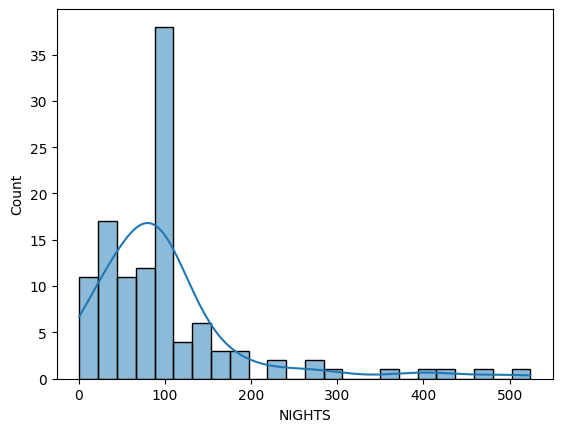

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_encoded['NIGHTS'], kde=True)

# Display the plot
plt.show()